In [1]:
!unzip /content/cat-in-the-dat.zip

Archive:  /content/cat-in-the-dat.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [3]:
train.shape, test.shape

((300000, 25), (200000, 24))

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


피처 요약표

In [6]:
def summary(df):
  summary = pd.DataFrame(df.dtypes,columns=['데이터 타입'])
  summary.reset_index(inplace=True)
  summary = summary.rename(columns={'index':'피처'})
  summary['결측치 수'] = df.isnull().sum().values
  summary['고유값 수'] = df.nunique().values
  # summary['데이터'] = df.iloc[:,:6].apply(lambda row: ','.join(map(str, row)), axis=1)
  summary['데이터'] = df.apply(lambda row: ','.join(map(str, row)), axis=1)
  return summary
summary(train)

,피처,데이터 타입,결측치 수,고유값 수,데이터
0,id,int64,0,300000,"0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Basso..."
1,bin_0,int64,0,2,"1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Pia..."
2,bin_1,int64,0,2,"2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremi..."
3,bin_2,int64,0,2,"3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f1..."
4,bin_3,object,0,2,"4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0..."
5,bin_4,object,0,2,"5,0,1,1,T,N,Blue,Polygon,Lion,Costa Rica,Oboe,..."
6,nom_0,object,0,3,"6,0,1,1,T,N,Green,Trapezoid,Cat,China,Piano,be..."
7,nom_1,object,0,6,"7,1,0,1,T,Y,Red,Triangle,Dog,Russia,Oboe,72f80..."
8,nom_2,object,0,6,"8,1,0,1,T,Y,Blue,Square,Hamster,Canada,Bassoon..."
9,nom_3,object,0,6,"9,0,0,0,F,Y,Red,Trapezoid,Lion,China,Piano,ad9..."


타깃값 분포
  - 데이터 편향

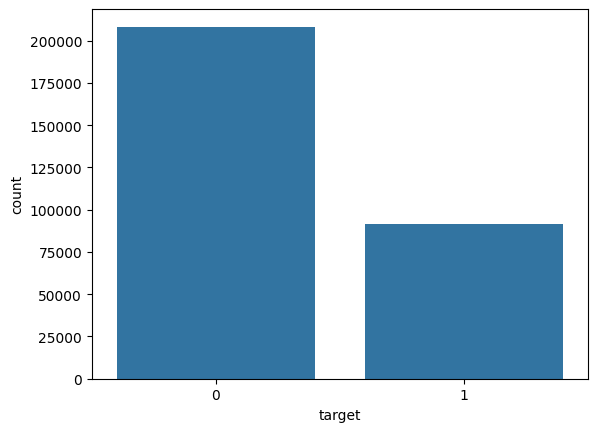

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=train,x = 'target')
plt.show()

데이터 합치기

In [8]:
all_data = pd.concat([train,test])
all_data = all_data.drop(columns=['id','target'])
all_data.shape

(500000, 23)

In [9]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8


one-hot인코딩

In [10]:
all_data.shape

(500000, 23)

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
all_data_onehot =  ohe.fit_transform(all_data)

In [12]:
# 학습용 테스트용 만들고 학습용은 다시 학습용과 검증용  데이터분포를 고려해서 분리한다.
split_num = len(train)
X_train = all_data_onehot[:split_num]
X_test = all_data_onehot[split_num:]
y = train['target']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# basemodel RogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
model.predict_proba(x_val)

array([[0.79012824, 0.20987176],
       [0.32139566, 0.67860434],
       [0.95897286, 0.04102714],
       ...,
       [0.89558377, 0.10441623],
       [0.61887674, 0.38112326],
       [0.81948207, 0.18051793]])

In [16]:
y_valid_preds = model.predict_proba(x_val)[:,1]  # 1될 확률 예측

In [17]:
y_valid_preds

array([0.20987176, 0.67860434, 0.04102714, ..., 0.10441623, 0.38112326,
       0.18051793])

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_valid_preds)

0.7946401533540395

In [19]:
# 타겟이 1일때의 예측
y_preds = model.predict_proba(X_test)[:,1]
submission['target'] = y_preds
submission.to_csv('submission.csv',index=False)

성능계선
  - rendomforest

In [38]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [39]:
# 두 데이터 합침
all_data = pd.concat([train,test])
all_data = all_data.drop(columns=['id','target'])

In [40]:
# 이진피처, 순서형피처
bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']
ord_features = ['ord_0','ord_1','ord_2','ord_3','ord_4','ord_5']

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_data['bin_3'] = le.fit_transform(all_data['bin_3'])
all_data['bin_4'] = le.fit_transform(all_data['bin_4'])

In [42]:
# ord_1, ord_2 사용자가 순서에 맞게 라벨인코딩
# ord_3 ~ 5 알파벳  OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
ord_345 = ['ord_3','ord_4','ord_5']
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

In [43]:
all_data['ord_1'].unique()
temp = {
    'Novice':0,
    'Contributor':1,
    'Expert':2,
    'Master':3,
    'Grandmaster':4
}
all_data['ord_1'] = all_data['ord_1'].map(temp)

In [44]:
all_data['ord_2'].unique()
temp={
    'Freezing':0,
    'Cold':1,
    'Warm':2,
    'Hot':3,
    'Boiling Hot':4,
    'Lava Hot':5
}
all_data['ord_2'] = all_data['ord_2'].map(temp)

In [45]:
all_data.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'],
      dtype='object')

In [46]:
# 명목형 피처는 onehot으로 encording
nom_cols = ['nom_'+str(i) for i in range(10)]
from sklearn.preprocessing import OneHotEncoder
nom_cols_encoding = OneHotEncoder().fit_transform(all_data[nom_cols])

In [47]:
nom_cols_encoding

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [48]:
all_data.drop(columns=nom_cols,inplace=True)

In [49]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,1,1,2,4,1,7.0,3.0,136.0,2,2
1,0,1,0,1,1,1,4,3,0.0,0.0,93.0,7,8
2,0,0,0,0,1,1,2,5,7.0,17.0,31.0,7,2
3,0,1,0,0,1,1,4,4,8.0,3.0,134.0,2,1
4,0,0,0,0,0,1,4,0,0.0,17.0,158.0,7,8


In [50]:
date_cols = ['day','month']
date_cols_encode =  OneHotEncoder().fit_transform(all_data[date_cols])
all_data.drop(columns=date_cols,inplace=True)
date_cols_encode

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [51]:
# 스케일일
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
0,0,0,0,1,1,2,4,1,7.0,3.0,136.0
1,0,1,0,1,1,1,4,3,0.0,0.0,93.0
2,0,0,0,0,1,1,2,5,7.0,17.0,31.0
3,0,1,0,0,1,1,4,4,8.0,3.0,134.0
4,0,0,0,0,0,1,4,0,0.0,17.0,158.0


In [55]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
all_data[['ord_0',	'ord_1',	'ord_2',	'ord_3',	'ord_4',	'ord_5']] \
  = mms.fit_transform(all_data[['ord_0',	'ord_1',	'ord_2',	'ord_3',	'ord_4',	'ord_5']])

In [57]:
# all_data, date_cols_encode,nom_cols_encoding 합치기
# one hot으로 만든 데이터는 희소행렬 한개빼고는 대부분 0으로 채워져 있는 데이터
from scipy import sparse
all_data_sparse = sparse.hstack((all_data,date_cols_encode,nom_cols_encoding),format='csr')
# 최종결과를 행 형식 Compressed Sparse Row
# all_data 매우 크고 대부분의 값이 0인 경우 메모리 사용을 효율적

In [58]:
all_data_sparse

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [59]:
# 데이터 나누기
train_num = len(train)
X_train = all_data_sparse[:train_num]
X_test = all_data_sparse[train_num:]
y = train['target']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, stratify=y, random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [63]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7949933448520138

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
params = {
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l1','l2'],
    'max_iter':[100,1000,10000]
}
grid_search = GridSearchCV(model,param_grid=params,cv=5,scoring='roc_auc')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)